In [2]:
import pandas as pd

dataset = pd.read_csv(r'C:\Users\LP Cheung\Documents\KDD2017_CUHK_new\data\preprocessed_input_interpolate_20min.csv')

In [3]:
dataset

,"(1, 0, 'cargocar')","(1, 0, 'etc')","(1, 0, 'motorcycle')","(1, 0, 'privatecar')","(1, 0, 'tot')","(1, 0, 'unknowncar')","(1, 1, 'cargocar')","(1, 1, 'etc')","(1, 1, 'motorcycle')","(1, 1, 'privatecar')",...,hour,pressure,sea_pressure,wind_direction,wind_speed,temperature,rel_humidity,precipitation,dayofweek,is_holiday
0,0,1.0,0,0,14.0,14.0,38.0,25.0,89.0,12.0,...,0,1013.200000,1018.200000,341.000000,3.500000,21.100000,68.000000,0.0,1,0
1,0,0.0,0,0,13.0,13.0,24.0,11.0,41.0,15.0,...,0,1013.233333,1018.233333,342.444444,3.400000,21.411111,66.888889,0.0,1,0
2,0,1.0,0,0,7.0,7.0,10.0,7.0,22.0,5.0,...,0,1013.266667,1018.266667,343.888889,3.300000,21.722222,65.777778,0.0,1,0
3,0,2.0,0,0,6.0,6.0,3.0,0.0,3.0,0.0,...,1,1013.300000,1018.300000,345.333333,3.200000,22.033333,64.666667,0.0,1,0
4,0,1.0,0,0,5.0,5.0,5.0,0.0,3.0,0.0,...,1,1013.333333,1018.333333,346.777778,3.100000,22.344444,63.555556,0.0,1,0
5,0,1.0,0,0,5.0,5.0,3.0,1.0,8.0,0.0,...,1,1013.366667,1018.366667,348.222222,3.000000,22.655556,62.444444,0.0,1,0
6,0,0.0,0,0,6.0,6.0,6.0,1.0,2.0,0.0,...,2,1013.400000,1018.400000,349.666667,2.900000,22.966667,61.333333,0.0,1,0
7,0,2.0,0,0,9.0,9.0,8.0,1.0,4.0,0.0,...,2,1013.433333,1018.433333,351.111111,2.800000,23.277778,60.222222,0.0,1,0
8,0,0.0,0,0,7.0,7.0,4.0,1.0,4.0,0.0,...,2,1013.466667,1018.466667,352.555556,2.700000,23.588889,59.111111,0.0,1,0
9,0,0.0,0,0,10.0,10.0,2.0,0.0,0.0,0.0,...,3,1013.500000,1018.500000,354.000000,2.600000,23.900000,58.000000,0.0,1,0


In [4]:
dataset.columns

Index(['(1, 0, 'cargocar')', '(1, 0, 'etc')', '(1, 0, 'motorcycle')',
       '(1, 0, 'privatecar')', '(1, 0, 'tot')', '(1, 0, 'unknowncar')',
       '(1, 1, 'cargocar')', '(1, 1, 'etc')', '(1, 1, 'motorcycle')',
       '(1, 1, 'privatecar')', '(1, 1, 'tot')', '(1, 1, 'unknowncar')',
       '(2, 0, 'cargocar')', '(2, 0, 'etc')', '(2, 0, 'motorcycle')',
       '(2, 0, 'privatecar')', '(2, 0, 'tot')', '(2, 0, 'unknowncar')',
       '(3, 0, 'cargocar')', '(3, 0, 'etc')', '(3, 0, 'motorcycle')',
       '(3, 0, 'privatecar')', '(3, 0, 'tot')', '(3, 0, 'unknowncar')',
       '(3, 1, 'cargocar')', '(3, 1, 'etc')', '(3, 1, 'motorcycle')',
       '(3, 1, 'privatecar')', '(3, 1, 'tot')', '(3, 1, 'unknowncar')',
       '('A', 2)', '('A', 3)', '('B', 1)', '('B', 3)', '('C', 1)', '('C', 3)',
       'date', 'hour', 'pressure', 'sea_pressure', 'wind_direction',
       'wind_speed', 'temperature', 'rel_humidity', 'precipitation',
       'dayofweek', 'is_holiday'],
      dtype='object')

In [5]:
sequence_10 = dataset['''(1, 0, 'tot')''']
sequence_10

0       14.0
1       13.0
2        7.0
3        6.0
4        5.0
5        5.0
6        6.0
7        9.0
8        7.0
9       10.0
10       8.0
11       5.0
12      11.0
13       8.0
14      15.0
15       9.0
16       4.0
17      10.0
18      13.0
19      20.0
20      29.0
21      38.0
22      30.0
23      31.0
24      53.0
25      50.0
26      45.0
27      51.0
28      68.0
29      59.0
        ... 
1987    47.0
1988    52.0
1989    46.0
1990    47.0
1991    35.0
1992    63.0
1993    56.0
1994    42.0
1995    43.0
1996    34.0
1997    25.0
1998    22.0
1999    24.0
2000    14.0
2001    26.0
2002    15.0
2003    16.0
2004    11.0
2005    17.0
2006    19.0
2007    17.0
2008    11.0
2009    18.0
2010    12.0
2011    10.0
2012     4.0
2013     1.0
2014     6.0
2015     2.0
2016     0.0
Name: (1, 0, 'tot'), dtype: float64

C:\Users\LP Cheung\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=360).mean()


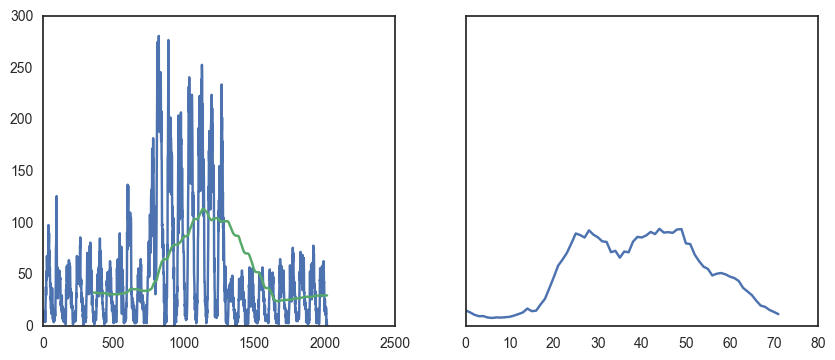

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

sns.set_style('white')


f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (10, 4))

#plot the total volume for route 10
moving_average = pd.rolling_mean(sequence_10, window = 360)
ax1.plot(sequence_10)
ax1.plot(moving_average)

means = np.zeros(72)
n = 0

for i in sequence_10:
    means[n%72] += i
    n += 1

means = means/28


#plot the mean volume over a day

ax2.plot(means)


In [7]:
#differencing the moving average to retain stationary
sequence_10_diff = sequence_10 - moving_average

In [8]:
sequence_10_diff.dropna(inplace = True)

C:\Users\LP Cheung\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=360).mean()


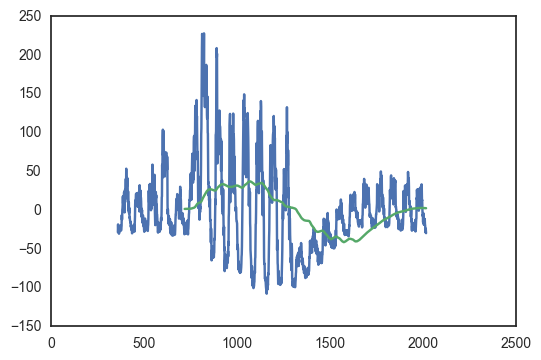

In [9]:
#remove the variation of mean

plt.plot(sequence_10_diff)
moving_average_diff = pd.rolling_mean(sequence_10_diff, window = 360)
plt.plot(moving_average_diff)

In [10]:
# remove the variation of mean

sequence_10_diff_1 = sequence_10 - sequence_10.shift()

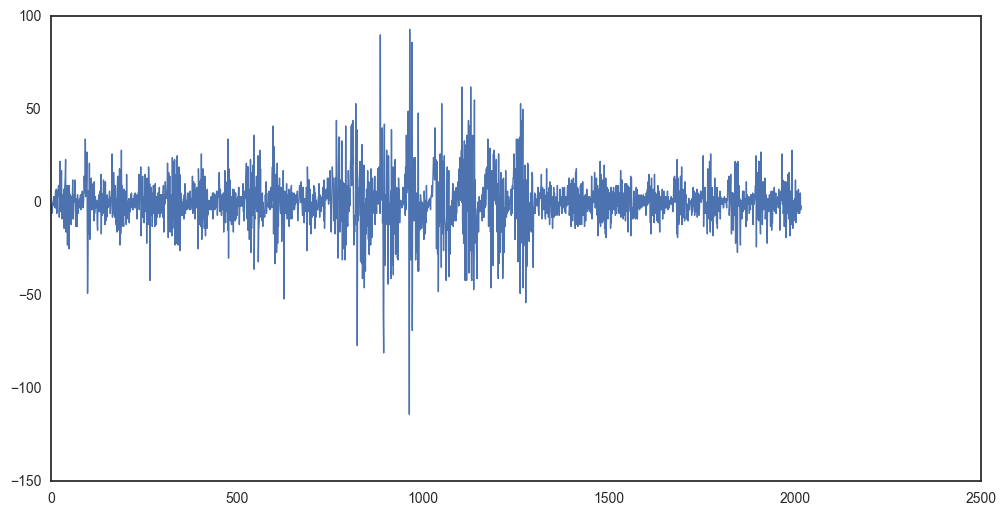

In [11]:
plt.figure(figsize = (12, 6))
plt.plot(sequence_10_diff_1, linewidth = 1)


In [12]:
sequence_10_diff_1.dropna(inplace = True)

In [13]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(sequence_10_diff_1, nlags=20)
lag_pacf = pacf(sequence_10_diff_1, nlags=20, method='ols')

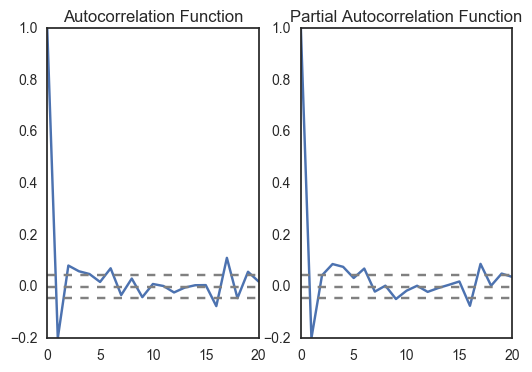

In [14]:
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(sequence_10_diff_1)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(sequence_10_diff_1)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122) 
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(sequence_10_diff_1)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(sequence_10_diff_1)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')

In [15]:
from datetime import datetime

def convert(date):

    return datetime.strptime(date, '%Y-%m-%d %H:%M:%S')

In [16]:
date = dataset['date'].apply(convert)

In [17]:
sequence_10.index = date
sequence_10_diff_1.index = date[1:]

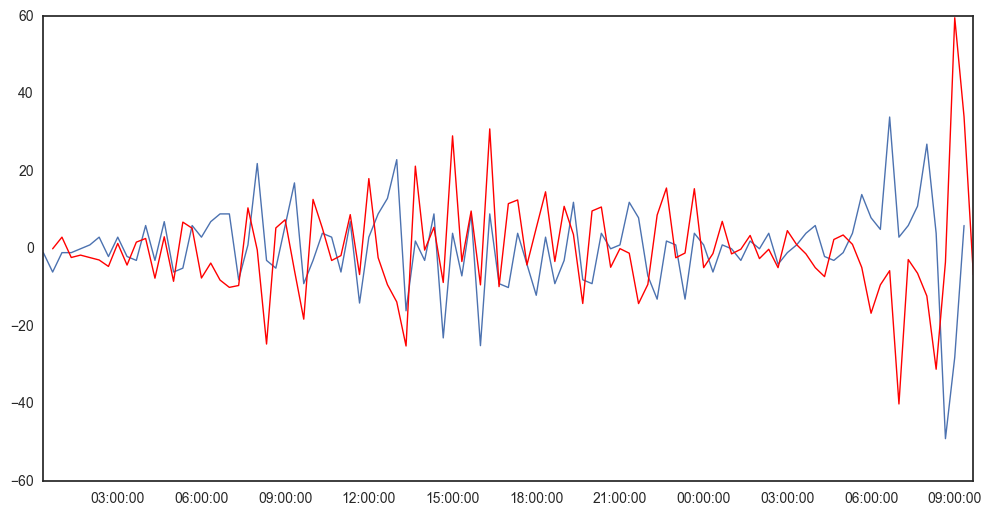

In [18]:
# train the model
from statsmodels.tsa.arima_model import ARIMA


plt.figure(figsize = (12, 6))
model = ARIMA(sequence_10_diff_1, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(sequence_10_diff_1[:100], linewidth = 1)
plt.plot(results_ARIMA.fittedvalues[:100], color='red', linewidth = 1)

In [19]:
prediction_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (prediction_diff)

date
2016-09-20 00:40:00    -0.000130
2016-09-20 01:00:00     2.997418
2016-09-20 01:20:00    -2.247393
2016-09-20 01:40:00    -1.634844
2016-09-20 02:00:00    -2.269600
2016-09-20 02:20:00    -2.891953
2016-09-20 02:40:00    -4.556562
2016-09-20 03:00:00     1.380704
2016-09-20 03:20:00    -4.197156
2016-09-20 03:40:00     1.714898
2016-09-20 04:00:00     2.659303
2016-09-20 04:20:00    -7.588879
2016-09-20 04:40:00     3.091025
2016-09-20 05:00:00    -8.394148
2016-09-20 05:20:00     6.879343
2016-09-20 05:40:00     5.304891
2016-09-20 06:00:00    -7.543139
2016-09-20 06:20:00    -3.689004
2016-09-20 06:40:00    -8.073479
2016-09-20 07:00:00    -9.959559
2016-09-20 07:20:00    -9.477832
2016-09-20 07:40:00    10.558712
2016-09-20 08:00:00    -0.301660
2016-09-20 08:20:00   -24.581852
2016-09-20 08:40:00     5.377299
2016-09-20 09:00:00     7.487831
2016-09-20 09:20:00    -5.570178
2016-09-20 09:40:00   -18.160994
2016-09-20 10:00:00    12.740717
2016-09-20 10:20:00     5.319054
     

In [20]:
prediction_diff_cumsum = prediction_diff.cumsum()

prediction_ARIMA = pd.Series(sequence_10_diff_1.ix[0], index=sequence_10_diff_1.index)
prediction_ARIMA = prediction_ARIMA.add(prediction_diff_cumsum,fill_value=0)

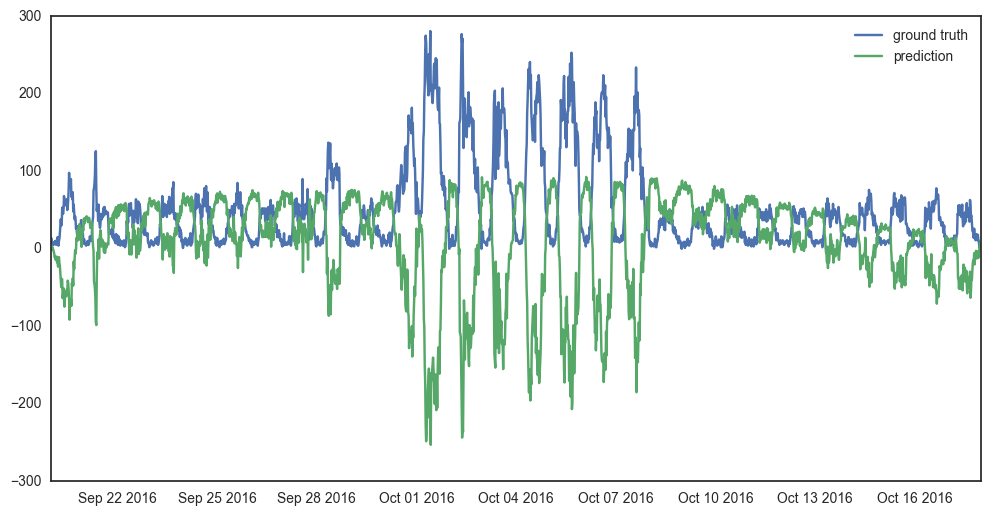

In [21]:
plt.figure(figsize = (12, 6))

plt.plot(sequence_10, label = 'ground truth')
plt.plot(prediction_ARIMA, label = 'prediction')

plt.legend()

In [22]:
prediction_diff_cumsum

date
2016-09-20 00:40:00    -0.000130
2016-09-20 01:00:00     2.997288
2016-09-20 01:20:00     0.749895
2016-09-20 01:40:00    -0.884949
2016-09-20 02:00:00    -3.154550
2016-09-20 02:20:00    -6.046502
2016-09-20 02:40:00   -10.603064
2016-09-20 03:00:00    -9.222360
2016-09-20 03:20:00   -13.419515
2016-09-20 03:40:00   -11.704617
2016-09-20 04:00:00    -9.045314
2016-09-20 04:20:00   -16.634194
2016-09-20 04:40:00   -13.543169
2016-09-20 05:00:00   -21.937317
2016-09-20 05:20:00   -15.057974
2016-09-20 05:40:00    -9.753082
2016-09-20 06:00:00   -17.296221
2016-09-20 06:20:00   -20.985225
2016-09-20 06:40:00   -29.058704
2016-09-20 07:00:00   -39.018264
2016-09-20 07:20:00   -48.496096
2016-09-20 07:40:00   -37.937384
2016-09-20 08:00:00   -38.239043
2016-09-20 08:20:00   -62.820895
2016-09-20 08:40:00   -57.443596
2016-09-20 09:00:00   -49.955765
2016-09-20 09:20:00   -55.525943
2016-09-20 09:40:00   -73.686937
2016-09-20 10:00:00   -60.946220
2016-09-20 10:20:00   -55.627166
     